In [1]:
import pandas as pd  
import numpy as np 
from scipy import stats
import matplotlib.pyplot as plt  
# import seaborn as seabornInstance 
# from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from regressors import stats
# from sklearn import linear_model
# from regressors import stats
# from sklearn import metrics
%matplotlib inline

In [2]:
#pull in data from csv
housing_census_df = pd.read_csv("Output/Chicago_Housing_and_Census_Data.csv")

yelp_df = pd.read_csv("Output/Yelp_Data.csv")

crime_df = pd.read_csv("Output/Crime_Count_by_Zip.csv")

airbnb_df = pd.read_csv("Output/AirBnB_Reviews_Zipcode.csv")
airbnb_df.head()

,Zipcode,AirBnB Review Count
0,46327,2.0
1,60202,0.0
2,60302,37.0
3,60304,1.0
4,60456,2.0


In [3]:
yelp_housing_df = pd.merge(yelp_df, housing_census_df, how='inner', on='Zipcode')
yelp_crime_housing_df = pd.merge(yelp_housing_df, crime_df, how='inner', on='Zipcode')
all_data_df = pd.merge(yelp_crime_housing_df, airbnb_df, how='inner', on='Zipcode')
housing_census_df.head()

,Zipcode,Median Rent,Median Home Value,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Lat,Lng
0,60601,1944.0,391000.0,13887.0,37.6,110215.0,95152.0,1171.0,8.432347,41.883993,-87.619706
1,60602,1666.0,NaN,1277.0,31.1,115774.0,77279.0,32.0,2.505873,41.883473,-87.629127
2,60603,1630.0,NaN,1197.0,26.7,140114.0,106207.0,261.0,21.804511,41.880916,-87.625425
3,60604,1835.0,NaN,668.0,40.6,114565.0,130966.0,127.0,19.011976,41.878485,-87.627893
4,60605,1865.0,284200.0,26188.0,33.6,107811.0,81144.0,2312.0,8.828471,41.870331,-87.623574


In [4]:
all_data_df['Nightlife per 1000 People'] = (all_data_df['Total Nightlife']/ all_data_df['Population'])*1000
all_data_df['Restaurants per 1000 People'] = (all_data_df['Total Restaurant']/ all_data_df['Population'])*1000
all_data_df['Grocery per 1000 People'] = (all_data_df['Total Grocery']/ all_data_df['Population'])*1000
all_data_df['Crime per 1000 People']=(all_data_df['Crime Count']/all_data_df['Population'])*1000
all_data_df.head()


,Zipcode,Total Nightlife,Total Restaurant,Total Grocery,Median Rent,Median Home Value,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Lat,Lng,Crime Count,AirBnB Review Count,Nightlife per 1000 People,Restaurants per 1000 People,Grocery per 1000 People,Crime per 1000 People
0,60601,48,150,7,1944.0,391000.0,13887.0,37.6,110215.0,95152.0,1171.0,8.432347,41.883993,-87.619706,1087,11.0,3.456470,10.801469,0.504069,78.274645
1,60602,11,78,0,1666.0,NaN,1277.0,31.1,115774.0,77279.0,32.0,2.505873,41.883473,-87.629127,8086,19.0,8.613939,61.080658,0.000000,6332.028191
2,60603,22,96,1,1630.0,NaN,1197.0,26.7,140114.0,106207.0,261.0,21.804511,41.880916,-87.625425,2086,10.0,18.379282,80.200501,0.835422,1742.690058
3,60604,5,41,0,1835.0,NaN,668.0,40.6,114565.0,130966.0,127.0,19.011976,41.878485,-87.627893,1062,22.0,7.485030,61.377246,0.000000,1589.820359
4,60605,34,112,7,1865.0,284200.0,26188.0,33.6,107811.0,81144.0,2312.0,8.828471,41.870331,-87.623574,2387,20.0,1.298305,4.276768,0.267298,91.148618


In [5]:
len(all_data_df)

57

In [6]:
#add a downtown dummy variable to signify if the zipcode is downtown.  These zips have different relationships to the
#independent variables
all_data_df["Downtown"] = " "
for index, row in all_data_df.iterrows():
    if row['Zipcode']==60602:
        all_data_df.loc[index, 'Downtown'] = 1
    elif row['Zipcode']==60603:
        all_data_df.loc[index, 'Downtown']= 1
    elif row['Zipcode']==60604:
        all_data_df.loc[index, 'Downtown']=1
    elif row['Zipcode']==60606:
        all_data_df.loc[index, 'Downtown']=1
    else:
        all_data_df.loc[index, 'Downtown']=0
all_data_df.head()

,Zipcode,Total Nightlife,Total Restaurant,Total Grocery,Median Rent,Median Home Value,Population,Median Age,Household Income,Per Capita Income,...,Poverty Rate,Lat,Lng,Crime Count,AirBnB Review Count,Nightlife per 1000 People,Restaurants per 1000 People,Grocery per 1000 People,Crime per 1000 People,Downtown
0,60601,48,150,7,1944.0,391000.0,13887.0,37.6,110215.0,95152.0,...,8.432347,41.883993,-87.619706,1087,11.0,3.456470,10.801469,0.504069,78.274645,0
1,60602,11,78,0,1666.0,NaN,1277.0,31.1,115774.0,77279.0,...,2.505873,41.883473,-87.629127,8086,19.0,8.613939,61.080658,0.000000,6332.028191,1
2,60603,22,96,1,1630.0,NaN,1197.0,26.7,140114.0,106207.0,...,21.804511,41.880916,-87.625425,2086,10.0,18.379282,80.200501,0.835422,1742.690058,1
3,60604,5,41,0,1835.0,NaN,668.0,40.6,114565.0,130966.0,...,19.011976,41.878485,-87.627893,1062,22.0,7.485030,61.377246,0.000000,1589.820359,1
4,60605,34,112,7,1865.0,284200.0,26188.0,33.6,107811.0,81144.0,...,8.828471,41.870331,-87.623574,2387,20.0,1.298305,4.276768,0.267298,91.148618,0


In [7]:
x = all_data_df[["Household Income", "Poverty Count", "AirBnB Review Count", "Nightlife per 1000 People", 
                        "Restaurants per 1000 People", "Grocery per 1000 People", "Crime per 1000 People"]].values
# x = all_data_df[["Household Income", "Poverty Count", "AirBnB Review Count", "Total Nightlife", 
#                         "Total Restaurant", "Total Grocery", "Crime per 1000 People"]].values
y = all_data_df['Median Rent'].values

In [8]:
regressor = LinearRegression()
regressor.fit(x, y)

#get r squared
xlabels = ["Household Income", "Poverty Count", "AirBnB Review Count", "Nightlife per 1000 People", 
                        "Restaurants per 1000 People", "Grocery per 1000 People", "Crime per 1000 People"]


stats.summary(regressor, x, y, xlabels)

Residuals:
      Min       1Q   Median       3Q       Max
-257.7996 -96.6604  10.2635  73.7256  296.7579


Coefficients:
                                Estimate  Std. Error  t value   p value
_intercept                   1151.349038  109.844699  10.4816  0.000000
Household Income                0.008325    0.000272  30.6467  0.000000
Poverty Count                  -0.002639    0.001775  -1.4871  0.142604
AirBnB Review Count             3.924335    1.466719   2.6756  0.009764
Nightlife per 1000 People     -15.680251   17.857151  -0.8781  0.383645
Restaurants per 1000 People    -5.006709    2.389072  -2.0957  0.040644
Grocery per 1000 People       -28.469199  125.340654  -0.2271  0.821146
Crime per 1000 People          -0.012387    0.022425  -0.5524  0.582880
---
R-squared:  0.68238,    Adjusted R-squared:  0.63700
F-statistic: 15.04 on 7 features


In [9]:
y_pred = regressor.predict(x)

In [10]:
zipcode =all_data_df['Zipcode'].tolist()
df = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
df_subset = df.head(15)

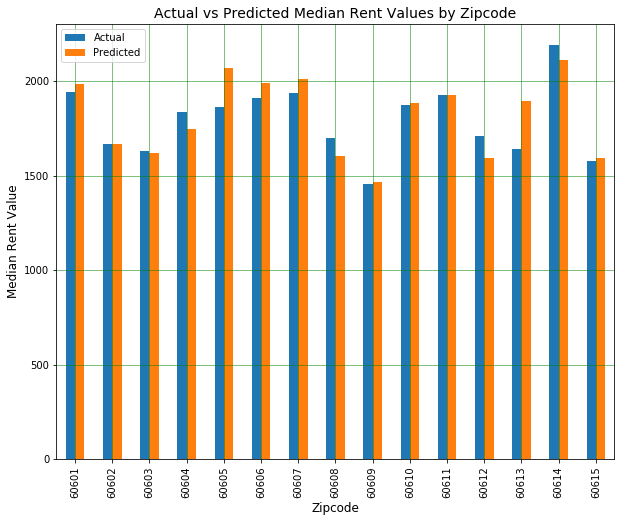

In [11]:
df_subset.plot(kind='bar',figsize=(10,8))
tick_locations = [value for value in range(0,len(df_subset))]
plt.xticks(tick_locations, zipcode)
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Actual vs Predicted Median Rent Values by Zipcode", fontsize=14)
plt.ylabel("Median Rent Value", fontsize=12)
plt.xlabel("Zipcode", fontsize=12)
plt.savefig("Images/Actual_vs_Predicted_Median_Rent.png", bbox_inches="tight")
plt.show()

In [12]:
correlation_data = all_data_df[["Median Rent", "Household Income", "Poverty Count", "AirBnB Review Count", "Nightlife per 1000 People", 
                        "Restaurants per 1000 People", "Grocery per 1000 People", "Crime per 1000 People" ]]
correlation_data.head()

,Median Rent,Household Income,Poverty Count,AirBnB Review Count,Nightlife per 1000 People,Restaurants per 1000 People,Grocery per 1000 People,Crime per 1000 People
0,1944.0,110215.0,1171.0,11.0,3.456470,10.801469,0.504069,78.274645
1,1666.0,115774.0,32.0,19.0,8.613939,61.080658,0.000000,6332.028191
2,1630.0,140114.0,261.0,10.0,18.379282,80.200501,0.835422,1742.690058
3,1835.0,114565.0,127.0,22.0,7.485030,61.377246,0.000000,1589.820359
4,1865.0,107811.0,2312.0,20.0,1.298305,4.276768,0.267298,91.148618


In [13]:
correlation_data.corr(method ='pearson') 

,Median Rent,Household Income,Poverty Count,AirBnB Review Count,Nightlife per 1000 People,Restaurants per 1000 People,Grocery per 1000 People,Crime per 1000 People
Median Rent,1.000000,0.661071,-0.563718,0.142537,0.196699,0.112060,0.261338,-0.043200
Household Income,0.661071,1.000000,-0.777840,-0.217836,0.736927,0.671674,0.493802,0.353043
Poverty Count,-0.563718,-0.777840,1.000000,0.318253,-0.481390,-0.431917,-0.324478,-0.248947
AirBnB Review Count,0.142537,-0.217836,0.318253,1.000000,-0.326911,-0.317759,-0.139320,-0.210502
Nightlife per 1000 People,0.196699,0.736927,-0.481390,-0.326911,1.000000,0.925086,0.476108,0.566486
Restaurants per 1000 People,0.112060,0.671674,-0.431917,-0.317759,0.925086,1.000000,0.407522,0.696910
Grocery per 1000 People,0.261338,0.493802,-0.324478,-0.139320,0.476108,0.407522,1.000000,-0.060257
Crime per 1000 People,-0.043200,0.353043,-0.248947,-0.210502,0.566486,0.696910,-0.060257,1.000000
